In [2]:
import pandas as pd

df = pd.read_csv("../../data/default.csv")

df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
df.shape

(10000, 4)

In [ ]:
# default och student är strings(Yes/No)
# default är om man kan betala tillbaka ett lån
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [7]:
df["student"].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [ ]:
# unbalanced dataset
df["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

<Axes: xlabel='balance', ylabel='income'>

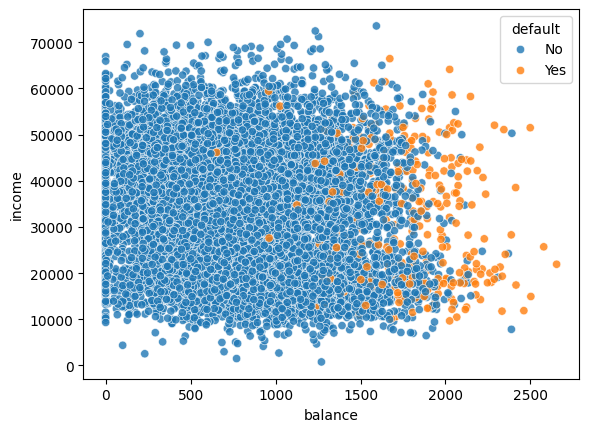

In [11]:
import seaborn as sns

sns.scatterplot(data=df, x="balance", y="income", hue="default", alpha=.8)

<Axes: xlabel='balance', ylabel='income'>

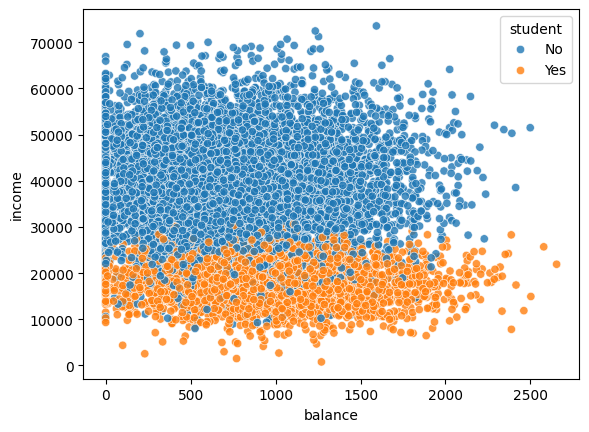

In [12]:
sns.scatterplot(data=df, x="balance", y="income", hue="student", alpha=.8)

<Axes: xlabel='default', ylabel='income'>

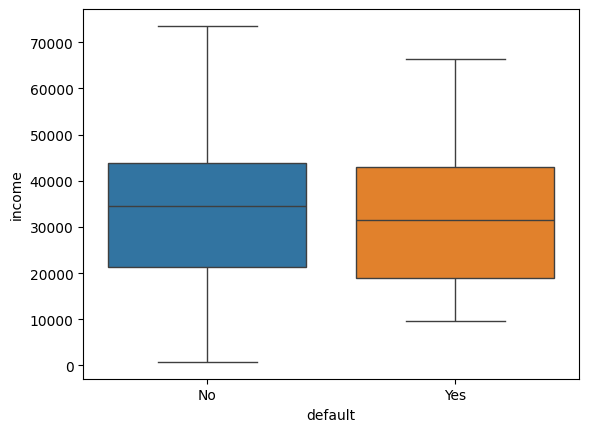

In [14]:
sns.boxplot(data=df, x="default", y="income", hue="default")

<Axes: xlabel='default', ylabel='balance'>

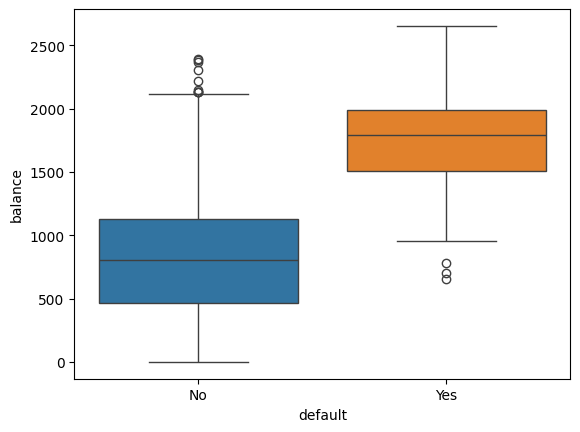

In [15]:
sns.boxplot(data=df, x="default", y="balance", hue="default")

In [16]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


## one-hot encoding

In [18]:
pd.get_dummies(df).head()

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,True,False,True,False
1,817.180407,12106.134700,True,False,False,True
2,1073.549164,31767.138947,True,False,True,False
3,529.250605,35704.493935,True,False,True,False
4,785.655883,38463.495879,True,False,True,False


## dummy encoding

In [22]:
pd.get_dummies(df, drop_first=True).head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [25]:
# ändra från bool till siffror 1/0
df_dummies = pd.get_dummies(df, drop_first=True)*1
df_dummies.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


## Logistic regression

#### train|test split

In [26]:
X, y = df_dummies.drop("default_Yes", axis=1), df_dummies["default_Yes"]
X.head()

,balance,income,student_Yes
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default_Yes, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((6700, 3), (3300, 3))

In [36]:
# train_test_split funktionen ser till att vi får bra uppdelad data, så att inte alla 1or i default_Yes hamnar i samma del(train/test)
# kan ändra random_state för att skifta detta litegrann
print(f"Proportion default in training data: {y_train.sum()/len(X_train):.3f}")
print(f"Proportion default in test data: {y_test.sum()/len(X_test):.3f}")
print(f"Proportion default in the whole dataset: {y.sum()/len(X):.3f}")

Proportion default in training data: 0.033
Proportion default in test data: 0.033
Proportion default in the whole dataset: 0.033


## Scale dataset

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.mean() = }")
print(f"{scaled_X_train.std() = }")
print(f"{scaled_X_test.mean() = }")
print(f"{scaled_X_test.std() = }")

scaled_X_train.mean() = np.float64(7.830110247306577e-17)
scaled_X_train.std() = np.float64(1.0)
scaled_X_test.mean() = np.float64(-0.0054675735434032815)
scaled_X_test.std() = np.float64(0.9870951848219804)


In [ ]:
# CV står för cross valuation
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # regularisering, minskar vikter, minskar overfitting, l1=RidgeRegression, standard är l2

model.fit(scaled_X_train, y_train)

# w0, w1, w2, vikterna för våra 3 features
model.coef_
# skärpunkten
model.intercept_

array([-6.26854245])

test classify two samples

In [41]:
test_samples = pd.DataFrame({"balance": [1500, 1500], "income": [40000, 40000], "student_Yes": [1, 0]})
test_samples

,balance,income,student_Yes
0,1500,40000,1
1,1500,40000,0


In [42]:
scaled_test_samples = scaler.transform(test_samples)
scaled_test_samples

array([[ 1.37268368,  0.47593334,  1.54286221],
       [ 1.37268368,  0.47593334, -0.64814602]])

In [ ]:
# predicta probability, multinomial logistic regression
model.predict_proba(scaled_test_samples)

array([[0.94279363, 0.05720637],
       [0.90028345, 0.09971655]])

In [ ]:
# motsvarar np.argmax(y_pred_samples)
model.predict(scaled_test_samples)

array([0, 0])

## predict on all test data and evaluate

In [45]:
y_pred = model.predict(scaled_X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], shape=(3300,))

In [46]:
y_pred_proba = model.predict_proba(scaled_X_test)
y_pred_proba

array([[9.29649665e-01, 7.03503348e-02],
       [9.98410011e-01, 1.58998929e-03],
       [9.99982519e-01, 1.74809051e-05],
       ...,
       [9.99700108e-01, 2.99891553e-04],
       [2.76058537e-01, 7.23941463e-01],
       [9.97453972e-01, 2.54602761e-03]], shape=(3300, 2))

## Evaluate

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)

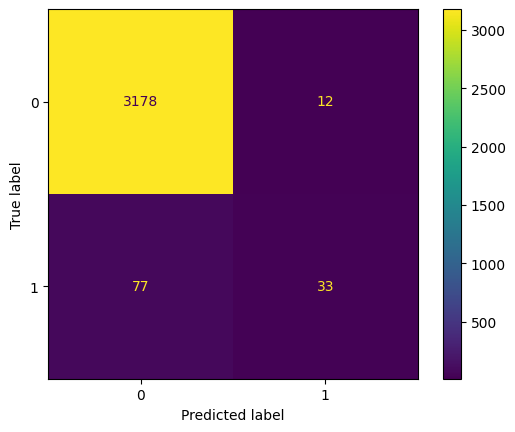

In [51]:
ConfusionMatrixDisplay(cm).plot()

## manual evaluation

In [55]:
TP = 33
TN = 3178
FP = 12
FN = 77

accuracy = (TP+TN) / (TP+TN+FP+FN)
precision = TP / (FP+TP)
recall = TP / (TP+FN)

print(f"{accuracy = :.3f}")
print(f"{precision = :.3f}")
print(f"{recall = :.3f}")

accuracy = 0.973
precision = 0.733
recall = 0.300


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3190
           1       0.73      0.30      0.43       110

    accuracy                           0.97      3300
   macro avg       0.85      0.65      0.71      3300
weighted avg       0.97      0.97      0.97      3300

